In [2]:
import pandas as pd
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
%matplotlib inline 
pd.set_option("precision", 3)

In [3]:
#CARGAR ACTIVOS Y FECHAS

start = date(2020, 1, 1) #poner fecha inicial
end = date(2021, 1, 1) #poner fecha final

bench1 = "AGG"
bench2 = "ACWI"

bench = [bench1, bench2]

ticker1 = "VCSH"
ticker2 = "HYG"
ticker3 = "LQD"
ticker4 = "AGG"
ticker5 = "VCIT"
ticker6 = "ANGL"
ticker7 = "ACWI"
ticker8 = "MOAT"
ticker9 = "EFA"
ticker10 = "SPY"
ticker11 = "SPHQ"
ticker12 = "EEM"
ticker13 = "XLF"
ticker14 = "EMQQ"
ticker15 = "VB"
ticker16 = "CEF"


tickers = [ticker1, ticker2, ticker3, ticker4, ticker5, ticker6, ticker7, ticker8, ticker9, 
           ticker10, ticker11, ticker12, ticker13, ticker14, ticker15, ticker16]

weight1 = 0.266
weight2 = 0.0573
weight3 = 0.0562
weight4 = 0.0431
weight5 = 0.0413
weight6 = 0.0411
weight7 = 0.1041
weight8 = 0.0978
weight9 = 0.07
weight10 = 0.0609
weight11 = 0.0453
weight12 = 0.0379
weight13 = 0.0156
weight14 = 0.0123
weight15 = 0.0103
weight16 = 0.0408

weights = [weight1, weight2, weight3, weight4, weight5, weight6, weight7, weight8, weight9, weight10,
          weight11, weight12, weight13, weight13, weight15, weight16]

weight_RF = 0.5
weight_RV = 0.5

bench_weights = [weight_RF, weight_RV]

print(sum(weights*100))

100.33000000000058


In [4]:

datos = DataReader(tickers, "yahoo", start, end)
datos_bench = DataReader(bench, "yahoo", start, end)
datos = datos["Adj Close"]
datos_bench = datos_bench["Adj Close"]
data = pd.DataFrame()
#datos_bench.head()
datos

Symbols,VCSH,HYG,LQD,AGG,VCIT,ANGL,ACWI,MOAT,EFA,SPY,SPHQ,EEM,XLF,EMQQ,VB,CEF
Date,,,,,,,,,,,,,,,,
2020-01-02,78.750,82.754,123.755,109.578,88.218,28.018,78.787,54.482,68.493,317.873,36.219,45.050,30.160,36.802,163.175,14.76
2020-01-03,78.857,82.670,124.180,109.899,88.469,28.074,78.108,54.166,67.644,315.466,35.925,44.214,29.839,36.253,162.585,14.88
2020-01-06,78.915,82.586,123.765,109.812,88.411,27.999,78.286,54.344,67.907,316.670,35.994,44.105,29.820,36.322,162.802,15.08
2020-01-07,78.827,82.511,123.446,109.695,88.344,28.056,78.089,54.363,67.722,315.779,35.866,44.076,29.626,36.792,162.438,15.17
2020-01-08,78.779,82.586,123.273,109.569,88.286,28.056,78.473,54.472,67.917,317.462,36.062,44.332,29.820,36.881,162.959,15.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,82.662,85.843,136.685,117.248,96.178,31.556,89.590,61.500,72.360,367.795,41.343,50.130,28.822,61.286,195.357,19.01
2020-12-28,82.692,85.951,136.774,117.268,96.198,31.606,90.180,61.570,72.950,370.955,41.552,50.270,28.962,60.010,194.390,19.13
2020-12-29,82.742,85.843,136.834,117.287,96.267,31.583,90.360,61.580,73.420,370.247,41.592,51.020,28.862,61.900,192.265,19.10


In [5]:

frecuencia = "B"

df_port = pd.date_range(start=start, end=end, freq = frecuencia)
mask1 = datos.index.isin(df_port)
datos_mens_port = datos.loc[mask1]
retornos_port = datos_mens_port.pct_change().dropna()

df_bench = pd.date_range(start=start, end=end, freq = frecuencia)
mask2 = datos_bench.index.isin(df_bench)
datos_mens_bench = datos_bench.loc[mask2]
retornos_bench = datos_mens_bench.pct_change().dropna()

retornos_bench.head()

Symbols,AGG,ACWI
Date,,
2020-01-03,2.929e-03,-0.009
2020-01-06,-7.966e-04,0.002
2020-01-07,-1.063e-03,-0.003
2020-01-08,-1.153e-03,0.005
2020-01-09,1.065e-03,0.006


In [6]:
weighted_returns = (weights * retornos_port)
bench_weighted_returns = (bench_weights * retornos_bench)

In [7]:
port_ret = weighted_returns.sum(axis=1) #axis = 1 es para sumar
bench_ret = bench_weighted_returns.sum(axis=1)
port_ret
bench_ret
df_variaciones = pd.concat([port_ret, bench_ret], axis=1)
df_variaciones.columns = ["Portafolio", "Benchmark"]
df_variaciones.head()

,Portafolio,Benchmark
Date,,
2020-01-03,-3.147e-03,-2.844e-03
2020-01-06,1.417e-03,7.355e-04
2020-01-07,-9.405e-04,-1.788e-03
2020-01-08,1.203e-03,1.881e-03
2020-01-09,3.167e-03,3.354e-03


In [8]:
crec_port = (1 + port_ret).cumprod()*100
crec_bench = (1+bench_ret).cumprod()*100

crecimientos = pd.concat([crec_port, crec_bench], axis=1)
crecimientos.columns = ["Portafolio", "Benchmark"]

ultimo = crecimientos.iloc[-1]
primero = crecimientos.iloc[0]
returns = ((ultimo - primero) - 1)

ann_returns = (1 + returns/100).pow(252/len(crecimientos))-1

volatility = df_variaciones.std()*np.sqrt(252)

risk_free = 0.02

sharpe = (ann_returns - risk_free) / volatility
ann_returns

Portafolio    0.123
Benchmark     0.118
dtype: float64

In [9]:
target_return = 0
df_negativos = df_variaciones[df_variaciones < target_return] # me arma dataframe solo con variaciones negativas
df_negativos = df_negativos.fillna(0) # me cambia los NaN por 0
downside_risk = df_negativos.std() * np.sqrt(252) *100
downside_risk

Portafolio    13.12
Benchmark     12.33
dtype: float64

In [10]:


rolling_max = crecimientos.rolling(min_periods = 1, window = 12).max() #me agarra el maximo
rolling_max.head(5)
monthly_drawdown = crecimientos / rolling_max - 1
#monthly_drawdown
monthly_drawdown*100
drawdowns = monthly_drawdown.min() * 100
drawdowns

Portafolio   -19.244
Benchmark    -16.846
dtype: float64

In [11]:
df_results = crecimientos.iloc[0:0] #me creo un dataframe vacío, solo con los títulos
output = [ann_returns*100, volatility*100, sharpe, downside_risk, drawdowns] # me armo una lista de los datos calculados
df_results = df_results.append(output, ignore_index=True)
df_results.rename(index = {0:"Return", 1:"Volatility", 2:"Sharpe", 3:"Downside Risk", 4:"Maximum Drawdown"}, inplace=True)
df_results = df_results.transpose()
df_results.round(2)

,Return,Volatility,Sharpe,Downside Risk,Maximum Drawdown
Portafolio,12.27,18.44,0.56,13.12,-19.24
Benchmark,11.82,17.22,0.57,12.33,-16.85


In [12]:
plt.style.use("fivethirtyeight")
crecimientos.plot()
rolling_returns = df_variaciones.rolling(window=12).mean()
rolling_returns.plot()
monthly_drawdown.plot()

AttributeError: 'numpy.datetime64' object has no attribute 'toordinal'

In [15]:
correlations = retornos_port.corr()
correlations.style.background_gradient(cmap='Blues').set_precision(2)

Symbols,VCSH,HYG,LQD,AGG,VCIT,ANGL,ACWI,MOAT,EFA,SPY,SPHQ,EEM,XLF,EMQQ,VB,CEF
Symbols,,,,,,,,,,,,,,,,
VCSH,1.00,0.53,0.82,0.43,0.79,0.65,0.38,0.28,0.40,0.34,0.30,0.40,0.29,0.33,0.37,0.39
HYG,0.53,1.00,0.53,0.24,0.51,0.83,0.83,0.81,0.81,0.83,0.80,0.75,0.81,0.61,0.84,0.24
LQD,0.82,0.53,1.00,0.69,0.94,0.59,0.35,0.28,0.37,0.34,0.31,0.33,0.30,0.29,0.37,0.32
AGG,0.43,0.24,0.69,1.00,0.69,0.37,0.16,0.11,0.21,0.14,0.09,0.17,0.13,0.18,0.21,0.25
VCIT,0.79,0.51,0.94,0.69,1.00,0.54,0.33,0.26,0.35,0.31,0.27,0.30,0.27,0.27,0.35,0.29
ANGL,0.65,0.83,0.59,0.37,0.54,1.00,0.72,0.67,0.72,0.70,0.67,0.70,0.70,0.59,0.72,0.29
ACWI,0.38,0.83,0.35,0.16,0.33,0.72,1.00,0.97,0.96,0.99,0.97,0.92,0.90,0.79,0.95,0.27
MOAT,0.28,0.81,0.28,0.11,0.26,0.67,0.97,1.00,0.92,0.97,0.95,0.85,0.94,0.70,0.96,0.18
EFA,0.40,0.81,0.37,0.21,0.35,0.72,0.96,0.92,1.00,0.92,0.90,0.91,0.89,0.75,0.93,0.28


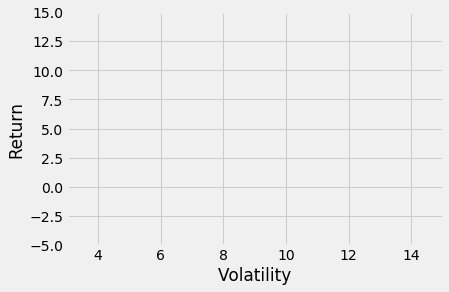

In [16]:
plt.style.use('fivethirtyeight')
scatter = df_results.iloc[:,[0,1]]
scatter_plot = scatter.plot.scatter(x="Volatility", y= "Return", s=[120])
plt.xlim(3, 15)
plt.ylim(-5, 15)
scatter_plot

ANÁLISIS DE SUBYACENTES

In [36]:
evolucion = (1 + retornos_port).cumprod()*100
ultimo = evolucion.iloc[-1]
tres_años = evolucion.iloc[-37] # agarra la fila de tres años para atrás SIEMPRE
cinco_años = evolucion.iloc[-61] # idem con la de 5

ret_3yr = ((ultimo / tres_años).pow(1/3)-1)*100 
ret_5yr = ((ultimo / cinco_años).pow(1/5)-1)*100
ret_3yr

Symbols
VCSH    0.281
HYG     0.820
LQD     0.863
AGG     0.360
VCIT    0.653
ANGL    1.650
ACWI    2.398
MOAT    2.557
EFA     2.634
SPY     1.929
SPHQ    1.778
EEM     2.653
XLF     3.144
EMQQ    2.356
VB      4.254
CEF     1.399
dtype: float64

In [37]:
df_3yr = retornos_port.iloc[-37:-1, :]
df_5yr = retornos_port.iloc[-61:-1, :]

standard_3yr = df_3yr.std() * np.sqrt(12)*100
standard_5yr = df_5yr.std() * np.sqrt(12)*100
standard_3yr

Symbols
VCSH    0.184
HYG     0.938
LQD     1.032
AGG     0.572
VCIT    0.559
ANGL    1.126
ACWI    2.483
MOAT    3.611
EFA     3.378
SPY     2.455
SPHQ    2.202
EEM     3.411
XLF     6.160
EMQQ    6.533
VB      3.706
CEF     5.281
dtype: float64

In [38]:
risk_free_3yr = 2 # acá se puede establecer un valor o calcularla desde un Excel
risk_free_5yr = 1.5

In [39]:
sharpe_3yr = (ret_3yr - risk_free_3yr) / standard_3yr
sharpe_3yr
sharpe_5yr = (ret_5yr - risk_free_5yr) / standard_5yr
#sharpe_5yr

In [40]:
rolling_max = evolucion.rolling(min_periods = 1, window = 60).max() #me agarra el maximo
monthly_drawdown = evolucion / rolling_max - 1
monthly_drawdown*100
drawdowns = monthly_drawdown.min() * 100
#drawdowns

In [21]:
new_df = retornos_port.iloc[0:0] #me creo un dataframe vacío, solo con los títulos
output = [ret_3yr, ret_5yr, standard_3yr, standard_5yr, sharpe_3yr, sharpe_5yr, drawdowns] # me armo una lista de los datos calculados
new_df = new_df.append(output, ignore_index=True)
new_df.rename(index = {0:"Return 3yr", 1:"Return 5yr", 2:"Standard 3yr", 3:"Standard 5yr", 4:"Sharpe 3yr", 5:"Sharpe 5 yr", 6:"Maximum Drawdown"}, inplace=True)
new_df = new_df.transpose().round(2)
new_df

,Return 3yr,Return 5yr,Standard 3yr,Standard 5yr,Sharpe 3yr,Sharpe 5 yr,Maximum Drawdown
Symbols,,,,,,,
VCSH,0.28,0.21,0.18,0.20,-9.34,-6.58,-12.86
HYG,0.82,0.96,0.94,1.20,-1.26,-0.45,-22.03
LQD,0.86,0.70,1.03,1.21,-1.10,-0.67,-21.76
AGG,0.36,0.19,0.57,0.61,-2.87,-2.14,-9.58
VCIT,0.65,0.46,0.56,0.69,-2.41,-1.50,-16.86
ANGL,1.65,1.68,1.13,1.32,-0.31,0.14,-29.31
ACWI,2.40,2.61,2.48,3.30,0.16,0.34,-33.53
MOAT,2.56,2.69,3.61,3.96,0.15,0.30,-33.31
EFA,2.63,2.80,3.38,3.77,0.19,0.34,-33.93


In [44]:
import pyfolio as pf
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import numpy as np
import pandas as pd
from pypfopt.cla import CLA
from pypfopt import plotting
from matplotlib.ticker import FuncFormatter

ModuleNotFoundError: No module named 'pypfopt'

In [ ]:
df1 = evolucion
df1

In [ ]:
mu = expected_returns.mean_historical_return(df1, frequency=252)
Sigma = risk_models.sample_cov(df1, frequency=252)

In [ ]:
ef = EfficientFrontier(mu, Sigma,  weight_bounds=(0.02, 0.15))
ef

In [ ]:
ef.max_sharpe()

In [ ]:
cleaned_weights = ef.clean_weights(cutoff=0.01, rounding = 2)
cleaned_weights

In [ ]:
ef.portfolio_performance(verbose=True)

In [ ]:
cla = CLA(mu, Sigma)
ax = plotting.plot_efficient_frontier(cla, showfig = False, show_assets = True)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

In [ ]:
trancar

In [ ]:
def multiple_dfs(df_list, sheets, file_name, spaces):
    writer = pd.ExcelWriter(file_name,engine='xlsxwriter')   
    row = 0
    for dataframe in df_list:
        dataframe.to_excel(writer,sheet_name=sheets,startrow=row , startcol=0)   
        row = row + len(dataframe.index) + spaces + 1
    writer.save()

# list of dataframes
dfs = [df_results, new_df, correlations]

# run function
multiple_dfs(dfs, 'Validation', 'resultados.xlsx', 1)

In [ ]:
from pd2ppt import df_to_powerpoint
import pandas as pd

df = pd.DataFrame(
    {'District':['Hampshire', 'Dorset', 'Wiltshire', 'Worcestershire'],
     'Population':[25000, 500000, 735298, 12653],
     'Ratio':[1.56, 7.34, 3.67, 8.23]})

df_to_powerpoint(
    r"C:\Code\Powerpoint\test58.pptx", df, col_formatters=['', ',', '.2'],
    rounding=['', 3, ''])